# Titanic Machine Learning

## 1. Import Libraries

In [458]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

## 2. Load Dataset

In [459]:
train_ds = pd.read_csv("./dataset/train.csv")
test_ds = pd.read_csv("./dataset/test.csv")

In [460]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [461]:
# df.fillna(0)


In [462]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
output = "Survived"

f_idx = lambda x : features.index(x)

In [463]:
# columns = list(train_ds.columns) 
for col in features:
    if True in train_ds[col].isna().values:
        print(col, "is missing values")

Age is missing values


In [464]:
X = train_ds[features].values
y = train_ds[output].values

## 3. Data Preprocessing

In [465]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(X[:, [f_idx("Age")]])

X[:, [f_idx("Age")]] = imputer.transform(X[:, [f_idx("Age")]])

### 3.1 Encode Categorical Data

In [467]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [f_idx("Sex")])], remainder="passthrough")
X = np.array(ct.fit_transform(X))

### 3.2 Split Dataset

In [469]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.3 Feature Scaling

In [470]:
X_train[0]

array([0.0, 1.0, 1, 45.5, 0, 0, 28.5], dtype=object)

In [471]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, [3, 6]] = sc.fit_transform(X_train[:, [3, 6]])
X_test[:, [3, 6]] = sc.transform(X_test[:, [3, 6]])

## 4. Train Model

In [472]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4.1 Visualize Model

In [473]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8044692737430168


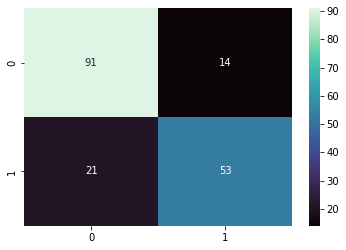

In [474]:
import seaborn as sb

sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="mako")

### 4.2 Make a Prediction

In [475]:
X[0]

array([0.0, 1.0, 3, 22.0, 1, 0, 7.25], dtype=object)

In [476]:
def predict(test):
    test = np.array([test], dtype="object")
    print(test)
    test = np.array(ct.fit_transform(test))
    print(test)
    X_train[:, [3, 6]] = sc.fit_transform(X_train[:, [3, 6]])
    test=np.array([test])
    test[:, [3,6]] = sc.fit_transform(test[:, [3, 6]])
    return classifier.predict(test)

In [477]:
ct.fit_transform(np.array([[3, "male", 22, 0, 0, 70]]))

array([['1.0', '3', '22', '0', '0', '70']], dtype='<U32')

In [478]:
predict([3, "male", 22, 0, 0, 70])

# ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [f_idx("Sex")])], remainder="passthrough")
# X = np.array(ct.fit_transform(X))

[[3 'male' 22 0 0 70]]
[[1.0 3 22 0 0 70]]


IndexError: index 3 is out of bounds for axis 1 with size 1